<a href="https://colab.research.google.com/github/Jothish2283/Debunkathon/blob/main/Debunkathon_Team_Fake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Getting the data**

In [ ]:
!wget https://zenodo.org/record/4561253/files/WELFake_Dataset.csv?download=1

--2023-02-15 14:16:25--  https://zenodo.org/record/4561253/files/WELFake_Dataset.csv?download=1
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 245086152 (234M) [text/plain]
Saving to: ‘WELFake_Dataset.csv?download=1’

WELFake_Dataset.csv 100%[===================>] 233.73M   534KB/s    in 7m 45s  

2023-02-15 14:24:11 (515 KB/s) - ‘WELFake_Dataset.csv?download=1’ saved [245086152/245086152]



In [ ]:
import pandas as pd

# loading the dataset to a pandas DataFrame
news_dataset = pd.read_csv('/content/WELFake_Dataset.csv?download=1')
# the first 5 rows of the dataframe
news_dataset.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [ ]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()#count no.of missing value in each column

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [ ]:
# replacing the null values with empty string
news_dataset = news_dataset.fillna('')#fillna fills with whatever we mention

#**Helper functions**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
def calculate_metrics(y_true, y_preds):
  model_results={"Accuracy": accuracy_score(y_true, y_preds),
                 "Precision": precision_score(y_true, y_preds),
                 "Recall": recall_score(y_true, y_preds),
                 "f1_score": f1_score(y_true, y_preds),
                 }
  return model_results

#**ML_Approach**

**Importing dependencies**

In [ ]:
import numpy as np
import pandas as pd
import re#useful for searching the text in the document
from nltk.corpus import stopwords# corpus: body of the particular text,nltk natural language tool kit,the text we are going to work,stopwords are those words which doesnt add value to our paragraph or text(the,an,a,..)
from nltk.stem.porter import PorterStemmer#stemming takes the word removes prefix and suffix of the word and returns the root of the word/root word
from sklearn.feature_extraction.text import TfidfVectorizer# TfidfVectorizer convert text into feature vectors
from sklearn.model_selection import train_test_split # splits train and test data
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# separating the data & label
X = news_dataset.drop(columns='label', axis=1)# axis = 1 represents columns
Y = news_dataset['label']

Stemming:
stemming is the process of reducing a word to its rootword
example:
actor,actress,acting-->act(rootword)

we do this for increasing performance

In [ ]:
port_stem = PorterStemmer()

In [ ]:
cachedStopWords = stopwords.words('english')

In [ ]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)# re :searching paragraph or text, sub :substitute certain values,˄:exclusion (we are taking only alphabets ,excluding other than the  thing which is present in the set) other than alphabets are written as ' '(space)
    stemmed_content = stemmed_content.lower()# converting all letters to lower case
    stemmed_content = stemmed_content.split()# splitting to converted to list
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in cachedStopWords] # returning only the rootwords for the words which are not present in the stopwords lib from stemmed content
    stemmed_content = ' '.join(stemmed_content)# joining the words
    return stemmed_content

In [ ]:
news_dataset['content'] = news_dataset['title']+' '+news_dataset['text']#creating new column called content

In [ ]:
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [ ]:
#separating the data and label
X = news_dataset['content'].values
Y = news_dataset['label'].values

In [ ]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()# term frequency inverse documentary freuency vectorizer , Tf;counts the no. of times the particular word is repeated in the paragraph,idf: finds the repeating words which doesnt add much difference
vectorizer.fit(X)

X = vectorizer.transform(X)

**Splitting the dataset to training and test data**

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,stratify =Y,random_state =2)# stratify segregates real and fake news in same proportion as that of original X,Y;

##**Model_LR**

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
lr_test_prediction = model_lr.predict(X_test)
model_lr_results=calculate_metrics(Y_test,lr_test_prediction)
model_lr_results

{'Accuracy': 0.9486379704720316,
 'Precision': 0.943088352348103,
 'Recall': 0.9579571486322598,
 'f1_score': 0.9504646032488802}

##**Model_KNN**

In [ ]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
knn_test_prediction = model_knn.predict(X_test)
model_knn_results=calculate_metrics(Y_test,knn_test_prediction)
model_knn_results

{'Accuracy': 0.6894711305191654,
 'Precision': 0.6302595446895207,
 'Recall': 0.9587656650047164,
 'f1_score': 0.760555852485302}

##**Model_SVM**

In [ ]:
model_svm = svm.SVC(kernel='linear')
model_svm.fit(X_train,Y_train)

SVC(kernel='linear')

In [ ]:
svm_test_prediction = model_svm.predict(X_test)
model_svm_results=calculate_metrics(Y_test,svm_test_prediction)
model_svm_results

{'Accuracy': 0.9591737714008456,
 'Precision': 0.9569288389513109,
 'Recall': 0.9640210214256839,
 'f1_score': 0.9604618379539505}

##**Model_DT**

In [ ]:
model_dt= tree.DecisionTreeClassifier(max_depth = 64)
model_dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=64)

In [ ]:
dt_test_prediction = model_dt.predict(X_test)
model_dt_results=calculate_metrics(Y_test,dt_test_prediction)
model_dt_results

{'Accuracy': 0.9373397102654745,
 'Precision': 0.9268963710205685,
 'Recall': 0.9533755558550061,
 'f1_score': 0.9399495150790488}

## **Model_XGBOOST**

In [ ]:
model_xgboost = XGBClassifier()
model_xgboost.fit(X_train, Y_train)

XGBClassifier()

In [ ]:
xgboost_test_prediction = model_xgboost.predict(X_test)
model_xgboost_results=calculate_metrics(Y_test,xgboost_test_prediction)
model_xgboost_results

{'Accuracy': 0.9412213211339849,
 'Precision': 0.9270955165692008,
 'Recall': 0.9613259668508287,
 'f1_score': 0.9439005027785128}

## **Model_LGBM**

In [ ]:
model_lgbm = LGBMClassifier()
model_lgbm.fit(X_train, Y_train)

LGBMClassifier()

In [ ]:
lgbm_test_prediction = model_lgbm.predict(X_test)
model_lgbm_results=calculate_metrics(Y_test,lgbm_test_prediction)
model_lgbm_results

{'Accuracy': 0.9645109863450475,
 'Precision': 0.956039603960396,
 'Recall': 0.9758792615550465,
 'f1_score': 0.9658575620165377}

## **Model_RF**

In [ ]:
model_rf = RandomForestClassifier(n_estimators= 10, criterion="entropy")
model_rf.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
rf_test_prediction = model_rf.predict(X_test)
model_rf_results=calculate_metrics(Y_test,rf_test_prediction)
model_rf_results

{'Accuracy': 0.9012961807721633,
 'Precision': 0.9153622385371936,
 'Recall': 0.8904460315321385,
 'f1_score': 0.9027322404371585}

## **Model_ENSEMBLE**

In [ ]:
def ensemble(predictions):
  return np.mean(predictions, axis=0)

In [ ]:
predictions = [lr_test_prediction,knn_test_prediction,svm_test_prediction,dt_test_prediction,xgboost_test_prediction,lgbm_test_prediction,rf_test_prediction]
ensemble_test_prediction = ensemble(predictions)

In [ ]:
ensemble_test_prediction  = np.where(ensemble_test_prediction>=0.5,1,0)
model_ensemble_results=calculate_metrics(Y_test,ensemble_test_prediction)
model_ensemble_results

{'Accuracy': 0.9628474388299716,
 'Precision': 0.9484173505275498,
 'Recall': 0.981134617976014,
 'f1_score': 0.9644986090872962}

##**Conclusion**

In [ ]:
results_df= pd.DataFrame({"model_LR": model_lr_results,
                          "model_KNN": model_knn_results,
                          "model_SVM": model_svm_results,
                          "model_DT": model_dt_results,
                          "model_XGBOOST": model_xgboost_results,
                          "model_LGBM": model_lgbm_results,
                          "model_RF": model_rf_results,
                          "model_ENSEMBLE": model_ensemble_results}).T

results_df

,Accuracy,Precision,Recall,f1_score
model_LR,0.948638,0.943088,0.957957,0.950465
model_KNN,0.689471,0.630260,0.958766,0.760556
model_SVM,0.959174,0.956929,0.964021,0.960462
model_DT,0.937340,0.926896,0.953376,0.939950
model_XGBOOST,0.941221,0.927096,0.961326,0.943901
model_LGBM,0.964511,0.956040,0.975879,0.965858
model_RF,0.901296,0.915362,0.890446,0.902732
model_ENSEMBLE,0.962847,0.948417,0.981135,0.964499


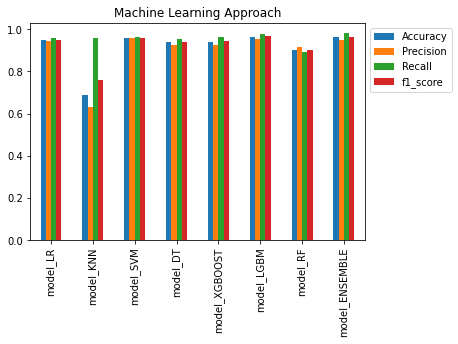

In [ ]:
results_df.plot(kind="bar", title="Machine Learning Approach").legend(bbox_to_anchor=(1,1));

#**DL_Aproach**

##**Model_1**:MLP

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
news_dataset.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [ ]:
content=news_dataset["text"]
labels=news_dataset["label"]
word_arr= [len(row.split()) for row in content]
word_98_percentile= int(np.percentile(word_arr, 98))
word_98_percentile

1994

In [ ]:
word_tokenizer= tf.keras.layers.TextVectorization(max_tokens= 20000,
                                                  output_sequence_length=word_98_percentile)

word_tokenizer.adapt(content)

word_embedding_1=tf.keras.layers.Embedding(input_dim= 20000,
                                         output_dim=128,
                                         input_length= word_98_percentile)

In [ ]:
inputs= tf.keras.layers.Input((1,), dtype="string")
x=word_tokenizer(inputs)
x=word_embedding_1(x)
x= tf.keras.layers.Dense(64, activation="relu")(x)
x=tf.keras.layers.GlobalMaxPool1D()(x)
x= tf.keras.layers.Dense(32, activation="relu")(x)
outputs= tf.keras.layers.Dense(1, activation="sigmoid")(x)

model_1=tf.keras.Model(inputs, outputs)

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

In [ ]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 1994)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 1994, 128)         2560000   
                                                                 
 dense (Dense)               (None, 1994, 64)          8256      
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_1 (Dense)             (None, 32)                2080  

**Splitting the data and fastening the load time**

In [ ]:
from sklearn.model_selection import train_test_split

train_text, test_text, train_labels, test_labels= train_test_split(content, labels)

train_dataset=tf.data.Dataset.from_tensor_slices((train_text, train_labels)).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset=tf.data.Dataset.from_tensor_slices((test_text, test_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
history_1=model_1.fit(train_dataset,
                          epochs=5,
                          callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True),
                                     tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", patience=2)],
                          validation_data=(test_dataset))

Epoch 1/5
1691/1691 [==============================] - 207s 119ms/step - loss: 0.1318 - accuracy: 0.9517 - val_loss: 0.0871 - val_accuracy: 0.9692 - lr: 0.0010
Epoch 2/5
1691/1691 [==============================] - 24s 14ms/step - loss: 0.0623 - accuracy: 0.9785 - val_loss: 0.0742 - val_accuracy: 0.9748 - lr: 0.0010
Epoch 3/5
1691/1691 [==============================] - 24s 14ms/step - loss: 0.0447 - accuracy: 0.9846 - val_loss: 0.0769 - val_accuracy: 0.9752 - lr: 0.0010
Epoch 4/5
1691/1691 [==============================] - 23s 14ms/step - loss: 0.0329 - accuracy: 0.9885 - val_loss: 0.0849 - val_accuracy: 0.9744 - lr: 0.0010
Epoch 5/5
1691/1691 [==============================] - 24s 14ms/step - loss: 0.0257 - accuracy: 0.9912 - val_loss: 0.0868 - val_accuracy: 0.9758 - lr: 0.0010


**Loss curves**

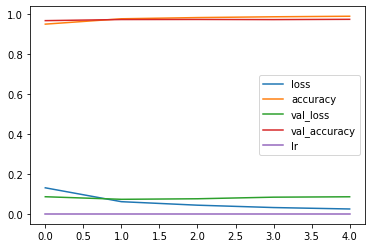

In [ ]:
pd.DataFrame(history_1.history).plot();

In [ ]:
y_preds=model_1.predict(test_dataset)
model_1_results= calculate_metrics(test_labels, y_preds.round().squeeze())

564/564 [==============================] - 4s 7ms/step


In [ ]:
model_1_results

{'Accuracy': 0.9757679937895087,
 'Precision': 0.9760964678262726,
 'Recall': 0.9772435897435897,
 'f1_score': 0.9766696919545139}

##**Model_2**:CNN

In [ ]:
word_embedding_2=tf.keras.layers.Embedding(input_dim= 20000,
                                         output_dim=128,
                                         input_length= word_98_percentile)

In [ ]:
inputs= tf.keras.layers.Input((1,), dtype="string")
x=word_tokenizer(inputs)
x=word_embedding_2(x)
x= tf.keras.layers.Conv1D(64, 3, activation="relu")(x)
x= tf.keras.layers.Conv1D(32, 3, activation="relu")(x)
x=tf.keras.layers.GlobalMaxPool1D()(x)
outputs= tf.keras.layers.Dense(1, activation="sigmoid")(x)

model_2=tf.keras.Model(inputs, outputs)

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

In [ ]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 1994)             0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 1994, 128)         2560000   
                                                                 
 conv1d (Conv1D)             (None, 1992, 64)          24640     
                                                                 
 conv1d_1 (Conv1D)           (None, 1990, 32)          6176      
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                          

In [ ]:
history_2=model_2.fit(train_dataset,
                          epochs=5,
                          callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True),
                                     tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", patience=2)],
                          validation_data=(test_dataset))

Epoch 1/5
1691/1691 [==============================] - 147s 83ms/step - loss: 0.0985 - accuracy: 0.9612 - val_loss: 0.0641 - val_accuracy: 0.9757 - lr: 0.0010
Epoch 2/5
1691/1691 [==============================] - 31s 18ms/step - loss: 0.0201 - accuracy: 0.9931 - val_loss: 0.0771 - val_accuracy: 0.9746 - lr: 0.0010
Epoch 3/5
1691/1691 [==============================] - 33s 20ms/step - loss: 0.0054 - accuracy: 0.9983 - val_loss: 0.0631 - val_accuracy: 0.9846 - lr: 0.0010
Epoch 4/5
1691/1691 [==============================] - 31s 18ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0730 - val_accuracy: 0.9837 - lr: 0.0010
Epoch 5/5
1691/1691 [==============================] - 30s 18ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.1062 - val_accuracy: 0.9790 - lr: 0.0010


**Loss curves**

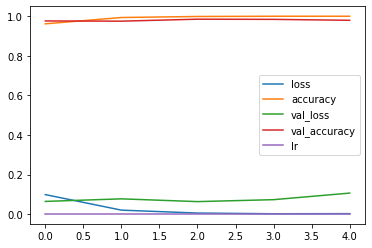

In [ ]:
pd.DataFrame(history_2.history).plot();

In [ ]:
y_preds= model_2.predict(test_dataset)
model_2_results= calculate_metrics(test_labels, y_preds.round().squeeze())

564/564 [==============================] - 4s 7ms/step


In [ ]:
model_2_results

{'Accuracy': 0.9789841410668737,
 'Precision': 0.9733319279013387,
 'Recall': 0.9865384615384616,
 'f1_score': 0.9798906987849525}

##**Model_3**: RNN(LSTM, GRU, Bidirectional)

In [ ]:
word_embedding_3=tf.keras.layers.Embedding(input_dim= 20000,
                                         output_dim=128,
                                         input_length= word_98_percentile)

In [ ]:
inputs= tf.keras.layers.Input((1,), dtype="string")
x=word_tokenizer(inputs)
x=word_embedding_3(x)
x= tf.keras.layers.LSTM(32, return_sequences=True)(x)
x= tf.keras.layers.GRU(32, return_sequences=True)(x)
x= tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16))(x)
outputs= tf.keras.layers.Dense(1, activation="sigmoid")(x)

model_3=tf.keras.Model(inputs, outputs)

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

In [ ]:
model_3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 1994)             0         
 torization)                                                     
                                                                 
 embedding_2 (Embedding)     (None, 1994, 128)         2560000   
                                                                 
 lstm (LSTM)                 (None, 1994, 32)          20608     
                                                                 
 gru (GRU)                   (None, 1994, 32)          6336      
                                                                 
 bidirectional (Bidirectiona  (None, 32)               6272      
 l)                                                        

In [ ]:
history_3=model_3.fit(train_dataset,
                      epochs=5,                         
                      callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True),
                                     tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", patience=2)],
                      validation_data=(test_dataset))

Epoch 1/5
1691/1691 [==============================] - 491s 286ms/step - loss: 0.1976 - accuracy: 0.9223 - val_loss: 0.1218 - val_accuracy: 0.9578 - lr: 0.0010
Epoch 2/5
1691/1691 [==============================] - 344s 203ms/step - loss: 0.1017 - accuracy: 0.9631 - val_loss: 0.1003 - val_accuracy: 0.9642 - lr: 0.0010
Epoch 3/5
1691/1691 [==============================] - 343s 203ms/step - loss: 0.0584 - accuracy: 0.9814 - val_loss: 0.1559 - val_accuracy: 0.9435 - lr: 0.0010
Epoch 4/5
1691/1691 [==============================] - 340s 201ms/step - loss: 0.0648 - accuracy: 0.9808 - val_loss: 0.0793 - val_accuracy: 0.9752 - lr: 0.0010
Epoch 5/5
1691/1691 [==============================] - 339s 201ms/step - loss: 0.0325 - accuracy: 0.9906 - val_loss: 0.0746 - val_accuracy: 0.9777 - lr: 0.0010


**Loss curves**

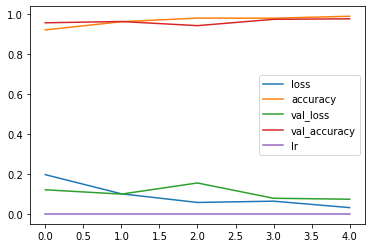

In [ ]:
pd.DataFrame(history_3.history).plot();

In [ ]:
y_preds= model_3.predict(test_dataset)
model_3_results=calculate_metrics(test_labels, y_preds.round().squeeze())

564/564 [==============================] - 50s 86ms/step


In [ ]:
model_3_results

{'Accuracy': 0.9776533215038261,
 'Precision': 0.973764942346345,
 'Recall': 0.9834401709401709,
 'f1_score': 0.9785786424281082}

##**Model_4**: Transfer_learning

In [ ]:
import tensorflow_hub as hub

link="https://tfhub.dev/google/universal-sentence-encoder/4"
embedding_layer= hub.KerasLayer(link, trainable=True)

In [ ]:
inputs= tf.keras.layers.Input([], dtype="string")
x=embedding_layer(inputs)
x= tf.keras.layers.Dense(64, activation="relu")(x)
x= tf.keras.layers.Dense(32, activation="relu")(x)
outputs= tf.keras.layers.Dense(1, activation="sigmoid")(x)

model_4=tf.keras.Model(inputs, outputs)

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
model_4.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None,)]                 0         
                                                                 
 keras_layer (KerasLayer)    (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 256,832,769
Trainable params: 256,832,769
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_4=model_4.fit(train_dataset,
                          epochs=5,
                          callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True),
                                     tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", patience=2)],
                          validation_data=(test_dataset))

NameError: ignored

**Loss curves**

In [ ]:
pd.DataFrame(history_4.history).plot();

In [ ]:
y_preds= model_4.predict(test_dataset)
model_4_results=calculate_metrics(test_labels, y_preds.round().squeeze())

In [ ]:
model_4_results

##**Model_5**: custom+transfer_learning

In [ ]:
word_embedding_4=tf.keras.layers.Embedding(input_dim= 20000,
                                         output_dim=128,
                                         input_length= word_98_percentile)

In [ ]:
input_custom=tf.keras.layers.Input((1,), dtype="string")
x=word_tokenizer(input_custom)
x=word_embedding_4(x)
output_custom=tf.keras.layers.GlobalMaxPool1D()(x)

model_custom=tf.keras.Model(input_custom, output_custom)

input_tl=tf.keras.layers.Input([], dtype="string")
output_tl=embedding_layer(input_tl)

model_tl=tf.keras.Model(input_tl, output_tl)

concatenate_layer= tf.keras.layers.Concatenate()([model_custom.output, model_tl.output])

x= tf.keras.layers.Dense(64, activation="relu")(concatenate_layer)
x= tf.keras.layers.Dense(32, activation="relu")(x)
outputs= tf.keras.layers.Dense(1, activation="sigmoid")(x)

#model_5
model_5= tf.keras.Model(inputs=[model_custom.input, model_tl.input],
                        outputs=outputs)

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

**Dual input**

In [ ]:
train_dataset_dual_inputs=tf.data.Dataset.from_tensor_slices((train_text, train_text))
train_dataset_dual_labels=tf.data.Dataset.from_tensor_slices(train_labels)
train_dataset_dual=tf.data.Dataset.zip((train_dataset_dual_inputs, train_dataset_dual_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

test_dataset_dual_inputs=tf.data.Dataset.from_tensor_slices((test_text, test_text))
test_dataset_dual_labels=tf.data.Dataset.from_tensor_slices(test_labels)
test_dataset_dual=tf.data.Dataset.zip((test_dataset_dual_inputs, test_dataset_dual_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset_dual, test_dataset_dual

In [ ]:
history_5=model_5.fit(train_dataset_dual,
                          epochs=5, 
                          callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True),
                                     tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", patience=2)],
                          validation_data=(test_dataset_dual))

**loss curves**

In [ ]:
pd.DataFrame(history_5.history).plot();  

In [ ]:
y_preds= model_5.predict(test_dataset_dual)
model_5_results=calculate_metrics(test_labels, y_preds.round().squeeze())

In [ ]:
model_5_results

##**model_6**: Ensemble

In [ ]:
word_embedding_5=tf.keras.layers.Embedding(input_dim= 20000,
                                         output_dim=128,
                                         input_length= word_98_percentile)

word_embedding_6=tf.keras.layers.Embedding(input_dim= 20000,
                                         output_dim=128,
                                         input_length= word_98_percentile)

In [ ]:
inputs= tf.keras.layers.Input((1,), dtype="string")
x=word_tokenizer(inputs)
x=word_embedding_5(x)
x= tf.keras.layers.Dense(64, activation="relu")(x)
x=tf.keras.layers.GlobalMaxPool1D()(x)
x= tf.keras.layers.Dense(32, activation="relu")(x)
outputs= tf.keras.layers.Dense(1, activation="sigmoid")(x)

model_1_ensemble=tf.keras.Model(inputs, outputs)

inputs= tf.keras.layers.Input((1,), dtype="string")
x=word_tokenizer(inputs)
x=word_embedding_6(x)
x= tf.keras.layers.Conv1D(64, 3, activation="relu")(x)
x= tf.keras.layers.Conv1D(32, 3, activation="relu")(x)
x=tf.keras.layers.GlobalMaxPool1D()(x)
outputs= tf.keras.layers.Dense(1, activation="sigmoid")(x)

model_2_ensemble=tf.keras.Model(inputs, outputs)

In [ ]:
%%time
pred_probs=[]

for i in range(3):
  
  model_1_ensemble.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])
  
  history_1_ensemble=model_1_ensemble.fit(train_dataset,
                            epochs=5,
                            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True),
                                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", patience=2)],
                            validation_data=(test_dataset),
                            verbose=0)
  y_preds=model_1_ensemble.predict(test_dataset).squeeze()
  pred_probs.append(y_preds.tolist())

  model_2_ensemble.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])
  
  history_2_ensemble=model_2_ensemble.fit(train_dataset,
                            epochs=5,
                            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True),
                                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", patience=2)],
                            validation_data=(test_dataset),
                            verbose=0)
  y_preds=model_2_ensemble.predict(test_dataset).squeeze()
  pred_probs.append(y_preds.tolist())

In [ ]:
pred_probs_1=np.array(pred_probs)
pred_probs_2=pred_probs_1.T
ensemble_preds=np.mean(pred_probs_2, axis=1)

In [ ]:
model_6_results= calculate_metrics(test_labels, ensemble_preds.round())
model_6_results

##**Conclusion**

In [ ]:
results_df= pd.DataFrame({"model_1: MLP": model_1_results,
                          "model_2: CNN": model_2_results,
                          "model_3: RNN": model_3_results,
                          "model_4: TL": model_4_results,
                          "model_5: Custom+TL": model_5_results,
                          "model_6: Ensemble": model_6_results}).T

results_df

In [ ]:
results_df.plot(kind="bar", title="Deep Learning Approach").legend(bbox_to_anchor=(1,1));           